In [ ]:
!pip install -q sklearn

In [ ]:
pip install -q tensorflow>=2 tfds-nightly matplotlib

In [5]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [6]:

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [7]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!chmod 600 /root/.kaggle/kaggle.json 

In [9]:
!!kaggle datasets download -d gyejr95/league-of-legends-challenger-ranked-games2020


['Downloading league-of-legends-challenger-ranked-games2020.zip to /content',
 '',
 '  0% 0.00/12.7M [00:00<?, ?B/s]',
 ' 39% 5.00M/12.7M [00:01<00:02, 3.78MB/s]',
 '',
 '100% 12.7M/12.7M [00:01<00:00, 9.08MB/s]']

In [ ]:
!ls

kaggle.json  league-of-legends-challenger-ranked-games2020.zip	sample_data


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf
import pandas as pd
from zipfile import ZipFile
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
zip_file = ZipFile('league-of-legends-challenger-ranked-games2020.zip')

dfs = {text_file.filename: zip_file.open(text_file.filename)
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
print(dfs)    

{'Challenger_Ranked_Games.csv': <zipfile.ZipExtFile name='Challenger_Ranked_Games.csv' mode='r' compress_type=deflate>, 'GrandMaster_Ranked_Games.csv': <zipfile.ZipExtFile name='GrandMaster_Ranked_Games.csv' mode='r' compress_type=deflate>, 'Master_Ranked_Games.csv': <zipfile.ZipExtFile name='Master_Ranked_Games.csv' mode='r' compress_type=deflate>}


In [36]:
# Import the test and train datasets into pandas dataframe
df_train_challenger = pd.read_csv(dfs['Challenger_Ranked_Games.csv'])
df_for_graphs = df_train_challenger.copy(deep=True)
df_test_challenger = df_train_challenger.copy(deep=True)

In [39]:
df_for_graphs

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,1,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,0,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,0,0,72,20,24,28,50,99418,41437,438,60,12.0,106,8,20122,13309,1,0,1,0,1,0,2,0,4,0,52,29,27,24,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,5,1,37,2,29,42,36,61816,61221,346,65,13.0,28,5,32837,44640,1,0,0,0,0,1,0,0,10,2,43,0,40,29,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,4,0,72,29,14,20,19,51604,45013,568,63,12.6,132,4,18131,45242,1,0,0,0,0,0,1,0,3,0,83,28,20,14,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,5,0,91,25,32,19,66,93059,58160,640,76,15.2,168,7,75427,60486,0,0,1,1,0,0,2,1,4,0,69,39,19,32,29,88366,52625,660,70,14.0,168,5,25003,45455


In [38]:
challenger_train = df_train_challenger[["blueWins"]]
challenger_test = df_test_challenger[["blueWins"]]

df_train_challenger.pop('blueWins')
df_train_challenger.pop("redWins")

0        1
1        0
2        1
3        1
4        0
        ..
26899    1
26900    1
26901    1
26902    0
26903    0
Name: redWins, Length: 26904, dtype: int64

In [40]:
df_train_challenger.pop("gameId")

0        4247263043
1        4247155821
2        4243963257
3        4241678498
4        4241538868
            ...    
26899    4143231833
26900    4157911901
26901    3764171638
26902    4110201724
26903    4100240254
Name: gameId, Length: 26904, dtype: int64

In [41]:
df_train_challenger.head()

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141


In [19]:
df_train_challenger.describe()

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000,26904.000000
mean,1448.653657,0.503531,0.525610,0.244090,0.406334,0.367120,1.389719,0.307018,4.397562,0.619871,58.640351,22.330137,24.189414,24.180568,39.986396,69746.341882,48169.129906,520.446588,65.024234,13.004847,129.586939,5.554193,25050.636225,38393.883066,0.494462,0.462719,0.266615,0.503531,0.348536,1.563857,0.336307,4.255910,0.584932,58.832255,21.912095,24.101175,24.268585,39.800736,69528.259441,48207.976398,526.337682,65.213165,13.042633,130.468704,5.541704,25505.503085,37648.115336
std,422.577288,0.499997,0.499353,0.429554,0.491157,0.482029,1.247393,0.537140,3.327761,0.901444,31.351606,15.502273,12.954288,13.042858,27.770103,35763.374883,15476.235577,175.971130,14.062380,2.812476,64.662998,3.493384,15112.644802,26335.664719,0.499979,0.498617,0.442197,0.499997,0.476515,1.299117,0.559479,3.325612,0.870919,31.621680,15.275608,13.024843,12.972992,27.722135,35866.105905,15627.093121,178.994313,14.105689,2.821138,64.618529,3.494662,15330.689295,26509.187910
min,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3704.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3340.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,11.000000,15.000000,15.000000,20.000000,43205.250000,37191.000000,409.000000,56.000000,11.200000,90.000000,3.000000,14105.500000,15608.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.000000,10.000000,15.000000,15.000000,20.000000,43068.250000,37127.250000,412.000000,56.000000,11.200000,91.000000,3.000000,14499.750000,14454.000000
50%,1435.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,21.000000,23.000000,23.000000,36.000000,65013.000000,48104.000000,534.000000,66.000000,13.200000,131.000000,5.000000,21990.000000,34940.500000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,58.000000,20.000000,23.000000,23.000000,35.000000,64655.000000,48037.000000,541.000000,66.000000,13.200000,132.000000,5.000000,22377.000000,33385.000000
75%,1738.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000,79.000000,32.000000,32.000000,32.000000,53.000000,90159.500000,58656.500000,639.000000,75.000000,15.000000,173.000000,7.000000,32725.750000,57829.250000,1.000000,1.000000,1.000000,1.000000,1.000000

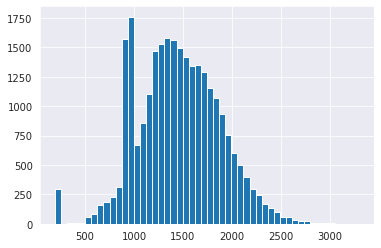

In [20]:
df_train_challenger.gameDuraton.hist(bins=50)

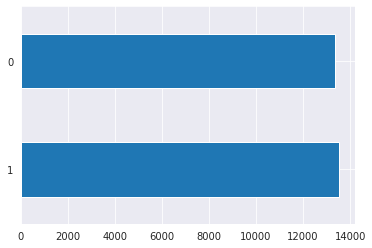

In [21]:
df_train_challenger.blueFirstBlood.value_counts().plot(kind='barh')

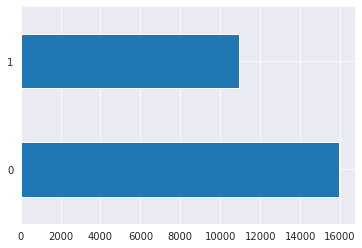

In [22]:
df_train_challenger.blueFirstDragon.value_counts().plot(kind='barh')

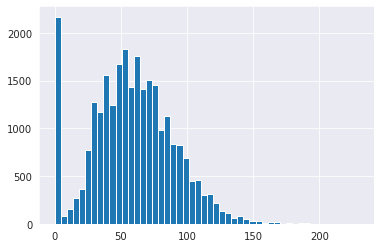

In [23]:
df_train_challenger.blueWardPlaced.hist(bins=50)

Text(0.5, 0, '% Blue Won')

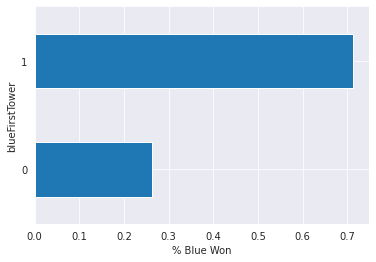

In [24]:
pd.concat([df_train_challenger, challenger_train], axis=1).groupby('blueFirstTower').blueWins.mean().plot(kind='barh').set_xlabel('% Blue Won')

In [42]:
pd.concat([df_for_graphs, challenger_test], axis=1).groupby('blueFirstBaron').blueWins.mean().plot(kind='barh').set_xlabel('% Blue Won')

AttributeError: ignored

In [27]:
df_for_graphs.head()

,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardPlaced,blueWardkills,blueKills,blueDeath,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,1,0,0,0,0,0,0,0,0,38,13,15,31,22,56039,37001,440,56,11.2,105,4,31035,5675,0,1,0,1,1,3,0,9,1,50,17,31,15,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,0,0,0,1,0,2,0,4,0,57,18,19,8,31,60243,41072,531,63,12.6,111,3,26397,45303,1,1,0,0,0,0,0,2,0,46,18,8,19,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,28,7,5,20,8,24014,22929,306,42,8.4,64,0,6567,5651,1,1,0,1,1,2,0,5,1,40,9,20,5,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,1,1,0,1,1,2,0,129,39,26,36,45,101607,63447,774,80,16.0,226,3,24718,31019,1,1,0,0,0,3,1,6,0,96,56,36,26,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,2,2,11,3,114,35,27,40,47,134826,74955,831,83,16.6,252,5,37161,95287,0,0,0,0,0,3,1,6,1,100,43,40,27,83,131536,74596,794,85,17.0,227,7,86431,64141


In [44]:
blue_corr = df_for_graphs.corr()['blueWins'][:].sort_values(axis=0, ascending=False) 
red_corr = df_for_graphs.corr()['redWins'][:].sort_values(axis=0, ascending=False) 
# pearson method normalizes values for me
print(blue_corr)

blueWins                   1.000000
blueTowerKills             0.708405
blueFirstInhibitor         0.637521
blueInhibitorKills         0.554367
blueObjectDamageDealt      0.525094
blueDragonKills            0.466442
blueKills                  0.453521
redDeath                   0.451537
blueFirstTower             0.449065
blueKillingSpree           0.420451
blueAssist                 0.372974
blueFirstBaron             0.366722
blueBaronKills             0.355048
blueTotalGold              0.276481
blueFirstDragon            0.267778
blueAvgLevel               0.226127
blueTotalLevel             0.226127
blueTotalHeal              0.215695
blueJungleMinionKills      0.207726
blueFirstBlood             0.206442
blueChampionDamageDealt    0.180180
blueTotalMinionKills       0.078853
blueWardkills              0.070485
blueWardPlaced             0.037542
gameDuraton               -0.001414
gameId                    -0.005385
redWardPlaced             -0.050044
redTotalMinionKills       -0

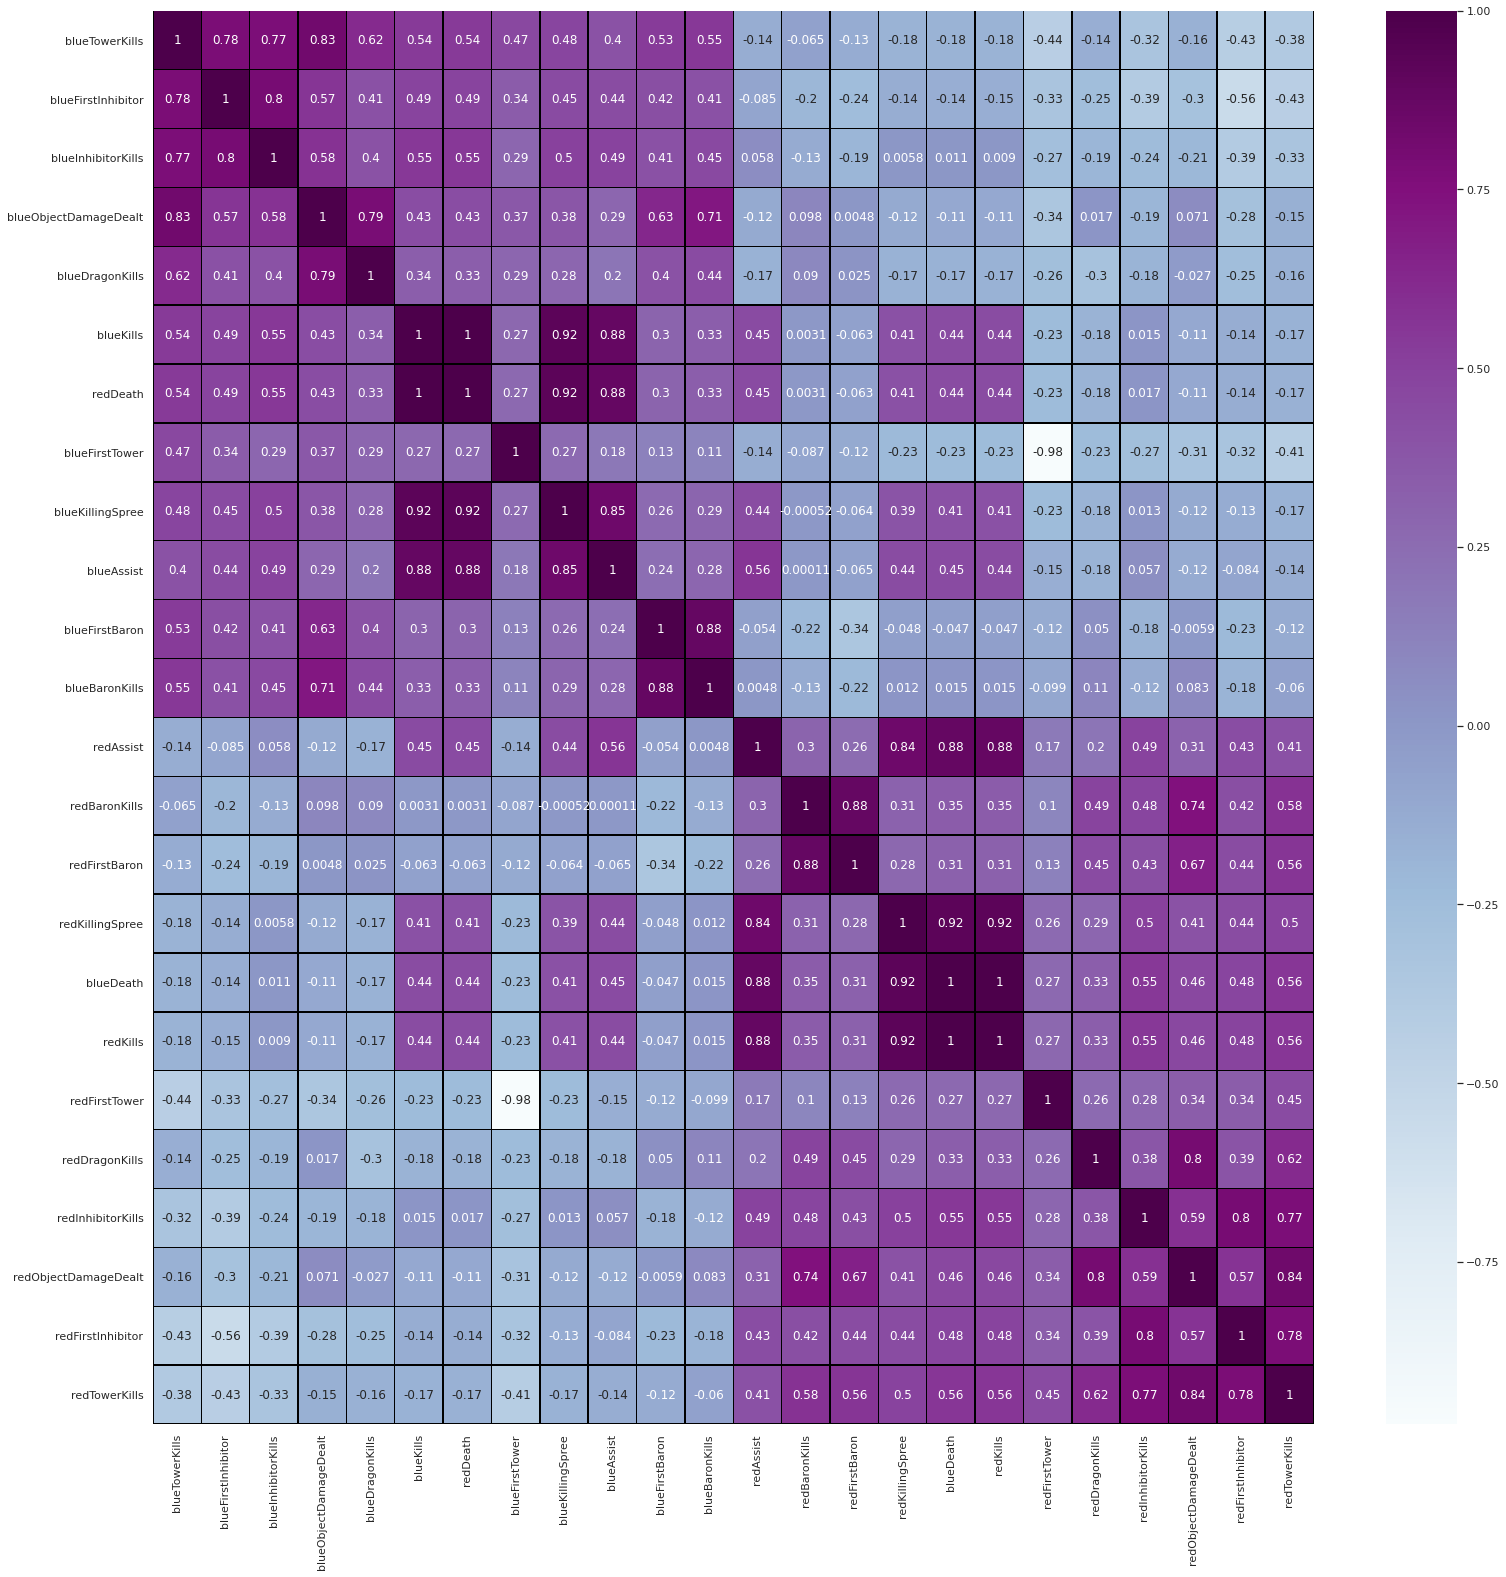

In [46]:
corr_cols = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.3 and prop != 'blueWins' and prop != 'redWins']
plt.figure(figsize=(26,26))
sns.set(font_scale = 1)
sns.heatmap(df_train_challenger[corr_cols].corr(), annot=True, linewidths=.5, linecolor='black', cmap="BuPu")

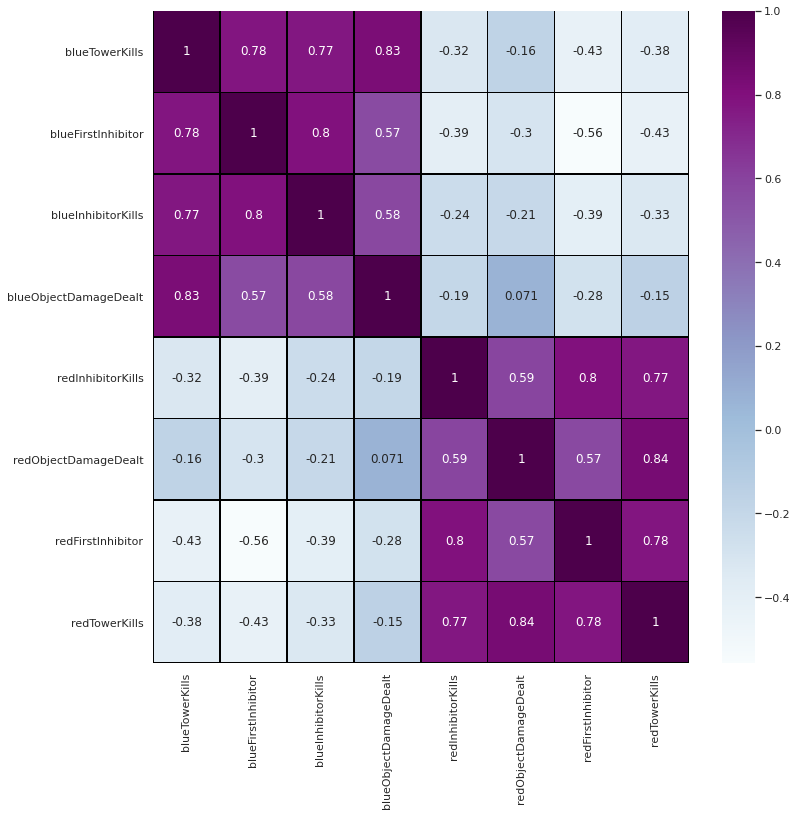

In [50]:
corr_cols_2 = [prop for prop,corr in blue_corr.iteritems() if abs(corr)>0.5 and prop != 'blueWins' and prop != 'redWins']
plt.figure(figsize=(12,12))
sns.set(font_scale = 1)
sns.heatmap(df_train_challenger[corr_cols_2].corr(), annot=True, linewidths=.5, linecolor='black', cmap="BuPu")

In [54]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(df_train_challenger, challenger_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(df_test_challenger, challenger_test, num_epochs=1, shuffle=False)

In [51]:
feature_columns = []
for feature_name in corr_cols_2:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

In [52]:
print(feature_columns)

[NumericColumn(key='blueTowerKills', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='blueFirstInhibitor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='blueInhibitorKills', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='blueObjectDamageDealt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='redInhibitorKills', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='redObjectDamageDealt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='redFirstInhibitor', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='redTowerKills', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [53]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_xmdwcji', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.9177074


In [57]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    # Two hidden layers of 30 and 10 nodes respectively.
    hidden_units=[30, 10],
    # The model must choose between 3 classes.
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6phyccvr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
def input_fn(features, batch_size=256):
#     # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
# features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = ['blueTowerKills', 'blueFirstInhibitor', 'blueInhibitorKills']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    val = input(feature + ": ")


predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    # print('Prediction is "{}" ({:.1f}%)'.format(
    #     [class_id], 100 * probability))

Please type numeric values as prompted.
blueTowerKills: 3
blueFirstInhibitor: 3
blueInhibitorKills: 3
INFO:tensorflow:Could not find trained model in model_dir: /tmp/tmp6phyccvr, running initialization to predict.
INFO:tensorflow:Calling model_fn.


ValueError: ignored